In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fin_df = pd.read_excel('../Data-ADR/Copia de Copia de CALIFICACIONYFINANCIAMIENTO.xlsx', sheet_name = 0)
dep_df = pd.read_excel('../Data-ADR/Copia de Copia de CALIFICACIONYFINANCIAMIENTO.xlsx', sheet_name = 1)

In [3]:
fin_df.head()

,BP,No. VP,Nombre Proyecto,Total beneficiarios,Hombres,Mujeres,Total Victimas,Valor cofinanciado ADR,Valor encargo fiduciario,Valor total cofinanciacion ADR,Valor Contrapartida,Valor total proyecto,Hectareas,resolucion,Fecha resolucion,Vigencia,Lineamiento de consejo directivo
0,1,1,Implementar un sistema de ganadería silvopasto...,46,26,20,0,534000000,NaN,5.340000e+08,115640000,6.496400e+08,40.00,1220,2018-06-29,2017,NaN
1,2,2,Fortalecimiento del cultivo de arroz y caña pa...,19,7,12,0,185000000,NaN,1.850000e+08,265082460,4.500825e+08,64.00,1234,2017-07-06,2017,NaN
2,3,3,Implementar un modelo piscícola para la produc...,52,36,16,31,905900513,NaN,9.059005e+08,104748820,1.010649e+09,0.50,1322,2017-08-15,2017,NaN
3,4,4,Mejorar las capacidades productivas para la ag...,150,121,29,0,2948347650,NaN,2.948348e+09,665760350,3.614108e+09,410.84,1307,2017-08-04,2017,NaN
4,5,5,Mejorar las capacidades productivas de 97 fami...,97,76,21,0,500000000,NaN,5.000000e+08,581106000,1.081106e+09,98.00,1215,2017-06-29,2017,NaN


In [4]:
dep_df.head()

,BP,No. VP,Departamento,Municipio
0,1,1,CAQUETÁ,18753
1,2,2,NARIÑO,52835
2,3,3,CAQUETÁ,18753
3,4,4,MAGDALENA,47980
4,5,5,CAUCA,19110


In [14]:
df = fin_df.merge(dep_df[['BP', 'Departamento', 'Municipio']], left_on='BP', right_on='BP')
df['YYYY'] = df['Fecha resolucion'].dt.year
df['MM'] = df['Fecha resolucion'].dt.month

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568 entries, 0 to 567
Data columns (total 21 columns):
BP                                  568 non-null int64
No. VP                              568 non-null int64
Nombre Proyecto                     568 non-null object
Total beneficiarios                 568 non-null int64
Hombres                             568 non-null int64
Mujeres                             568 non-null int64
Total Victimas                      568 non-null int64
Valor cofinanciado ADR              568 non-null int64
Valor encargo fiduciario            45 non-null float64
Valor total cofinanciacion ADR      568 non-null float64
Valor Contrapartida                 568 non-null int64
Valor total proyecto                568 non-null float64
Hectareas                           568 non-null float64
resolucion                          568 non-null int64
Fecha resolucion                    568 non-null datetime64[ns]
Vigencia                            568 non-null int6

In [16]:
print('Cantidad de datos: {}'.format(df.shape))
print('Nombre de las columnas:')
for ii in range(df.shape[1]):
    print('{}. {}'.format(ii+1, df.columns[ii]))

Cantidad de datos: (568, 21)
Nombre de las columnas:
1. BP
2. No. VP
3. Nombre Proyecto
4. Total beneficiarios
5. Hombres
6. Mujeres
7. Total Victimas
8. Valor cofinanciado ADR
9. Valor encargo fiduciario
10. Valor total cofinanciacion ADR
11. Valor Contrapartida
12. Valor total proyecto
13. Hectareas
14. resolucion
15. Fecha resolucion
16. Vigencia
17. Lineamiento de consejo directivo
18. Departamento
19. Municipio
20. YYYY
21. MM


In [17]:
df.describe()

,BP,No. VP,Total beneficiarios,Hombres,Mujeres,Total Victimas,Valor cofinanciado ADR,Valor encargo fiduciario,Valor total cofinanciacion ADR,Valor Contrapartida,Valor total proyecto,Hectareas,resolucion,Vigencia,Municipio,YYYY,MM
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02,4.500000e+01,5.680000e+02,5.680000e+02,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,266.429577,153.484155,181.679577,126.186620,55.492958,43.235915,1.734348e+09,2.639057e+07,1.736439e+09,9.231794e+08,2.659618e+09,354.834723,620.073944,2016.936620,36667.408451,2018.001761,6.811620
std,368.988109,81.414045,136.274296,98.387262,48.193356,48.216011,1.070145e+09,1.203242e-01,1.070186e+09,1.671076e+09,2.317916e+09,557.689615,396.110407,0.783109,22911.699017,0.577348,2.754135
min,1.000000,1.000000,12.000000,0.000000,0.000000,0.000000,9.095862e+07,2.639057e+07,9.095862e+07,1.951500e+07,1.183336e+08,0.000000,8.000000,2016.000000,5034.000000,2017.000000,1.000000
25%,100.000000,98.000000,81.000000,55.750000,21.000000,8.000000,6.647758e+08,2.639057e+07,6.658164e+08,2.899320e+08,1.007128e+09,15.750000,342.000000,2016.000000,18717.250000,2018.000000,5.000000
50%,152.000000,149.000000,170.000000,119.000000,40.000000,30.000000,1.998477e+09,2.639057e+07,1.998477e+09,5.017277e+08,2.394322e+09,128.000000,573.000000,2017.000000,25775.500000,2018.000000,7.000000
75%,342.250000,217.500000,228.000000,167.000000,81.000000,60.500000,2.500000e+09,2.639057e+07,2.500000e+09,1.045456e+09,3.629732e+09,390.000000,759.000000,2017.000000,52317.000000,2018.000000,8.000000
max,2908.000000,338.000000,740.000000,529.000000,211.000000,328.000000,5.661882e+09,2.639057e+07,5.688273e+09,1.817003e+10,2.268047e+10,2897.000000,1601.000000,2019.000000,99773.000000,2020.000000,12.000000


### Preguntas que se pueden responder con este dataset:

1. Cuales son los departamentos donde ha habido mayor beneficio a las personas del conflicto armado?
2. Cuales son los departamentos donde ha habido mayor financiamiento?
3. Cuales son las lineas productivas que presentan mayor financiamiento por parte del ADR? (Diccionario de palabras)

1. Cuales son los departamentos donde ha habido mayor beneficio a las personas del conflicto armado?

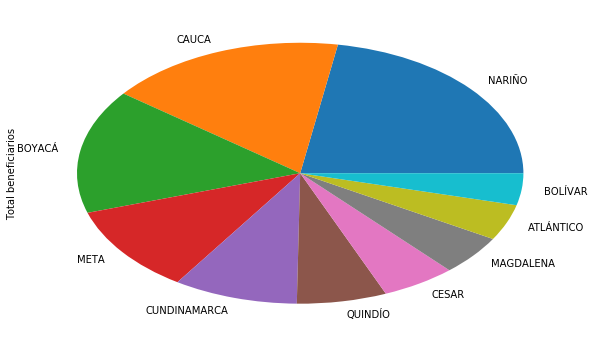

In [18]:
df.groupby('Departamento')['Total beneficiarios'].sum().sort_values(ascending=False)[:10].plot.pie(figsize=(10, 6))

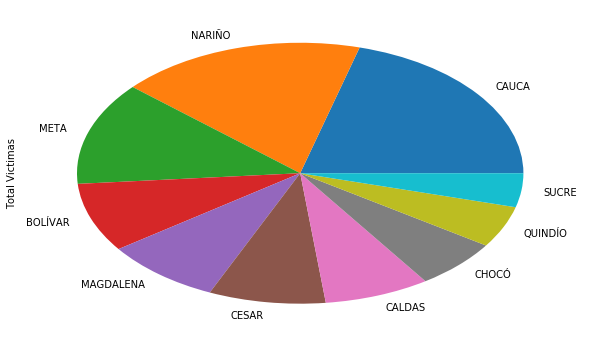

In [19]:
df.groupby('Departamento')['Total Victimas'].sum().sort_values(ascending=False)[:10].plot.pie(figsize=(10, 6))

In [20]:
df.groupby(['YYYY', 'MM'])[['Total beneficiarios', 'Total Victimas']].agg(['mean', 'count'])

Total beneficiarios       Total Victimas      
                       mean count           mean count
YYYY MM                                               
2017 6            41.000000     6       0.000000     6
     7            36.000000    11      10.363636    11
     8            50.142857    14      13.285714    14
     9            38.500000     2      12.000000     2
     10          237.743590    39      72.128205    39
     11           90.400000    10      23.600000    10
     12           43.500000     4      20.750000     4
2018 2           127.974359    39      47.102564    39
     3           328.442623    61      75.147541    61
     4           189.034483    29      52.896552    29
     5            77.136364    22      37.954545    22
     6           245.272727    33      21.060606    33
     7           185.137615   109      57.357798   109
     8           164.425287    87      31.379310    87
     9           180.227273    22      17.545455    22
     10           22.000000     1       5.000000     1
2019 7            82.600000    10      25.600000    10
     8            53.000000     2      17.500000     2
     9           226.214286    14       3.928571    14
     11          180.794118    34      45.352941    34
     12           59.272727    11      17.090909    11
2020 1           219.250000     8      21.000000     8

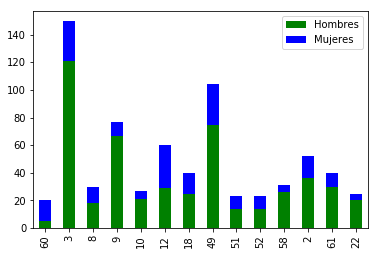

In [21]:
year = 2017
month = 8
df[(df['YYYY'] == year) & (df['MM'] == month)].sort_values('Fecha resolucion')['Hombres'].plot.bar(legend=True, label='Hombres', color='g')
df[(df['YYYY'] == year) & (df['MM'] == month)].sort_values('Fecha resolucion')['Mujeres'].plot.bar(legend=True, label='Mujeres', bottom=(df[(df['YYYY'] == year) & (df['MM'] == month)].sort_values('Fecha resolucion')['Hombres']), color='b')

2. Cuales son los departamentos donde ha habido mayor financiamiento?

In [36]:
# Los valores estan en millones
df.groupby(['Departamento', 'YYYY'])[['Valor cofinanciado ADR']].agg(['min', 'mean', 'max']).apply(lambda x: x/1000000.0)

Valor cofinanciado ADR                          
                                                 min         mean          max
Departamento             YYYY                                                 
ANTIOQUIA                2017             176.999998   296.256333   459.683250
                         2018             269.932220   829.416449  1510.249410
                         2019            1932.352818  1932.352818  1932.352818
                         2020            3310.959800  3310.959800  3310.959800
ARAUCA                   2017             499.970760   499.970760   499.970760
                         2018            1749.975000  1749.975000  1749.975000
                         2019             375.523000   375.523000   375.523000
ATLÁNTICO                2018             411.026500  1990.644879  2200.000000
BOLÍVAR                  2018             550.000000  2021.516467  2400.349786
                         2019             495.472158  1358.333329  2221.194500
                         2020             977.966000   977.966000   977.966000
BOYACÁ                   2018             191.645000  3053.041302  3618.584000
                         2019            1571.900000  1571.900000  1571.900000
CALDAS                   2018             500.000000  1322.536216  1972.185600
                         2019             265.536000   265.536000   265.536000
CAQUETÁ                  2017             125.000000   384.212103   905.900513
                         2018             160.000000  1768.250000  2500.000000
CASANARE                 2018             498.366600   498.366600   498.366600
                         2019             470.000000   470.000000   470.000000
CAUCA                    2017             197.000000  1525.056538  2840.000000
                         2018             709.887870  2259.842898  2400.747900
                         2019            2940.000000  2940.000000  2940.000000
CESAR                    2017             501.238122   501.238122   501.238122
                         2018             300.848000  2380.529724  3000.000000
                         2019             548.743100  1271.276702  3000.000000
CHOCÓ                    2017             250.000000   291.484047   346.452142
                         2018             137.396400   782.093459  1500.000000
                         2019             699.698000   699.698000   699.698000
CUNDINAMARCA             2018             401.273590  1830.505818  2479.938287
                         2019             510.724262  2740.181158  3058.675000
...                                              ...          ...          ...
HUILA                    2018             232.852000   392.329113   515.154000
LA GUAJIRA               2017              90.958625    90.958625    90.958625
                         2018             284.477000  2376.821354  3010.248182
MAGDALENA                2017            2948.347650  2948.347650  2948.347650
                         2018             300.650000  2412.247378  3122.424900
                         2019            2662.871920  2662.871920  2662.871920
META                     2017             250.000000   301.960000   500.000000
                         2018             199.970000  2114.462470  3120.000000
NARIÑO                   2017             175.000000   268.553100   534.212400
                         2018             434.216599  1723.484715  2470.000000
                         2019             533.630234  1945.899595  2596.815000
NORTE DE SANTANDER       2017             251.600000   252.192739   252.785478
                         2018            1000.000000  1000.000000  1000.000000
                         2019             345.194000   604.224736  1654.263892
                         2020            4800.000000  4800.000000  4800.000000
PUTUMAYO                 2017             190.833000   191.153000   191.473000
                         2018            1500.000000  1500.000000  1500.000000
Q

3. Cuales son las lineas productivas que presentan mayor financiamiento por parte del ADR? (Diccionario de palabras)

In [41]:
# Los valores estan en millones
df[df['Nombre Proyecto'].str.find('arroz')>=0].groupby(['Departamento'])[['Valor cofinanciado ADR']].sum().apply(lambda x: x/1000000.0)

,Valor cofinanciado ADR
Departamento,
ANTIOQUIA,729.615470
BOLÍVAR,9421.194500
NARIÑO,185.000000
NORTE DE SANTANDER,4800.000000
PUTUMAYO,190.833000
SUCRE,8018.191892
